In [3]:
import tensorflow as tf
import os

process = tf.config.experimental.list_physical_devices('GPU')

for gpu in process:
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')

[]

In [4]:
import cv2
import imghdr

data_dir = 'data'

img_type = ['jpeg', 'jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_type:
                print('Image not in list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            

Image not in list data\car\1200px-2019_Toyota_Corolla_Icon_Tech_VVT-i_Hybrid_1.8.jpg
Image not in list data\car\2022-EQB-AMGLINE-SUV-AVP-DR.png
Image not in list data\car\2023-EQE350-SEDAN-AVP-DR.png
Image not in list data\car\640px-2017_Toyota_Camry_28ASV70R29_SX_sedan_282018-11-0229_01.jpg
Image not in list data\car\643833d4a87446f67ecf20cf_Toyota_63d0517997cbdf9598476dde_Toyota.webp
Image not in list data\car\6438352c591f746fb0ab7dfa_jaguar_63d0517997cbdf2934476de8_Jaguar-F-PACE.webp
Image not in list data\car\buy-a-used-car-at-pull-a-part.webp
Image not in list data\car\fxslide1.jpg
Image not in list data\car\Homepage-W16-Mistral-card.jpeg
Image not in list data\car\lucid-air-stealth-slide-2-desktop.webp
Image not in list data\merge\3337f459-3c39-4595-b7de-409dffd57d7f.webp
Image not in list data\merge\68082_129_w4-1_b_lg.gif
Image not in list data\merge\fig2c_08.gif
Image not in list data\merge\road-merge-sign-illustration-131609100_iconl.jpeg
Image not in list data\stop\74539_75_

Found 1401 files belonging to 5 classes.


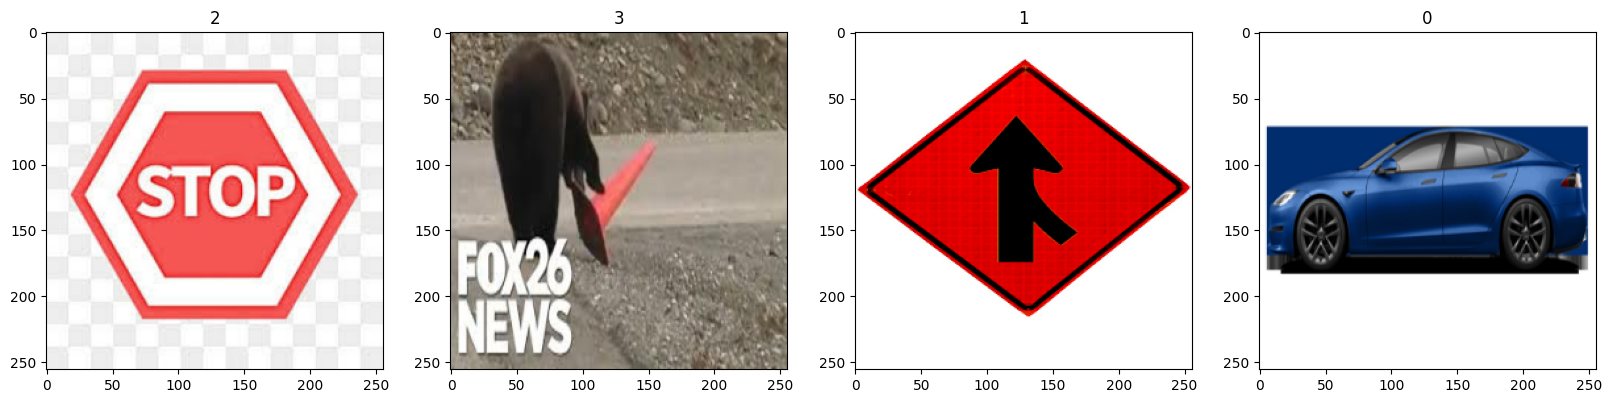

In [7]:
import numpy as np
from matplotlib import pyplot as plt

data = tf.keras.utils.image_dataset_from_directory('data')
data_it = data.as_numpy_iterator()

batch = data_it.next()

fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    

In [28]:
num_classes = 5
data = data.map(lambda x,y: (x / 255, tf.one_hot(y, num_classes)))
data.as_numpy_iterator().next()

(array([[[[0.00358299, 0.00362913, 0.00373678],
          [0.00359935, 0.00364549, 0.00375314],
          [0.00358327, 0.00362941, 0.00373706],
          ...,
          [0.00317427, 0.00325116, 0.00331268],
          [0.00331453, 0.00339142, 0.00345294],
          [0.00317708, 0.00325397, 0.00331549]],
 
         [[0.00364031, 0.00368644, 0.00379409],
          [0.00358324, 0.00362937, 0.00373702],
          [0.00363652, 0.00368266, 0.00379031],
          ...,
          [0.00321032, 0.00328722, 0.00334873],
          [0.00325928, 0.00333617, 0.00339769],
          [0.00324629, 0.00332318, 0.0033847 ]],
 
         [[0.00357807, 0.00362421, 0.00373186],
          [0.00361765, 0.00366378, 0.00377144],
          [0.00363868, 0.00368482, 0.00379247],
          ...,
          [0.00331242, 0.00338932, 0.00345083],
          [0.00325782, 0.00333472, 0.00339623],
          [0.00324657, 0.00332347, 0.00338498]],
 
         ...,
 
         [[0.00370627, 0.00376778, 0.00378316],
          [0.00374

In [29]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

In [30]:
train_size

30

In [31]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [32]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout



model = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

model.compile('adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 30, 30, 16)       

In [37]:
logdir = 'logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])


Epoch 1/20
30/30 [==============================] - 66s 2s/step - loss: 0.5268 - accuracy: 0.2083 - val_loss: 0.4989 - val_accuracy: 0.2383
Epoch 2/20
30/30 [==============================] - 40s 1s/step - loss: 0.4940 - accuracy: 0.2719 - val_loss: 0.4919 - val_accuracy: 0.2578
Epoch 3/20
30/30 [==============================] - 48s 1s/step - loss: 0.4950 - accuracy: 0.2594 - val_loss: 0.4933 - val_accuracy: 0.2695
Epoch 4/20
30/30 [==============================] - 38s 1s/step - loss: 0.4946 - accuracy: 0.2656 - val_loss: 0.4909 - val_accuracy: 0.2344
Epoch 5/20
30/30 [==============================] - 32s 1s/step - loss: 0.4924 - accuracy: 0.2844 - val_loss: 0.4966 - val_accuracy: 0.2734
Epoch 6/20
30/30 [==============================] - 32s 1s/step - loss: 0.4940 - accuracy: 0.2646 - val_loss: 0.4926 - val_accuracy: 0.2695
Epoch 7/20
30/30 [==============================] - 35s 1s/step - loss: 0.4939 - accuracy: 0.2656 - val_loss: 0.4927 - val_accuracy: 0.2305
Epoch 8/20
30/30 [==

In [40]:
test_loss, test_accuracy = model.evaluate(test)

4/4 [==============================] - 35s 251ms/step - loss: 1.6094 - accuracy: 0.2344


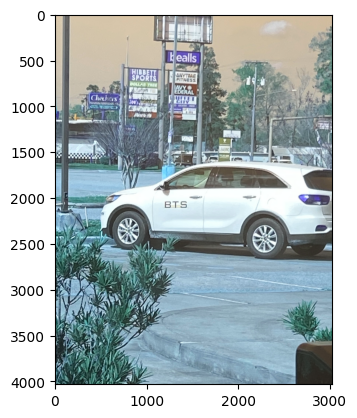

In [41]:
import cv2

img = cv2.imread('car.jpeg')
plt.imshow(img)
plt.show()

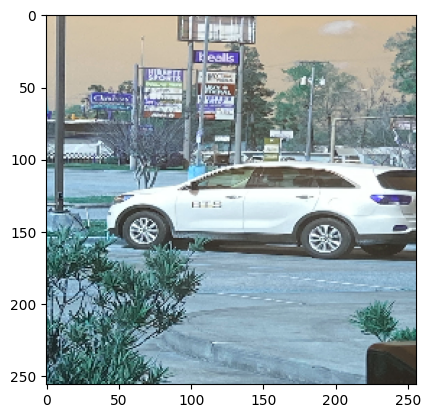

In [42]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [44]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 410ms/step
Test Loss: 1.6094379425048828
Test Accuracy: 0.234375


In [46]:
img2 = cv2.imread('cone.png')
resize2 = tf.image.resize(img2, (256, 256))
cone = model.predict(np.expand_dims(resize2/255, 0))
cone

1/1 [==============================] - 0s 227ms/step


array([[0.19719689, 0.21149614, 0.17311406, 0.21493675, 0.20325612]],
      dtype=float32)